In [2]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Listar los archivos en el directorio de entrada de Kaggle
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Cargar el dataset
data = pd.read_csv('/kaggle/input/datatrain/dataTrain_balanced_timestamp.csv')

# Limpiar el dataset si es necesario (por ejemplo, eliminando columnas innecesarias)
data.drop(columns=['Unnamed: 0.1'], inplace=True)

# Convertir la columna de timestamp a formato datetime si es necesario
data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


# Definir variables predictoras (X) y la variable objetivo (y)
X = data.drop(columns=['label', 'time_stamp'])  # Eliminamos la columna 'label' y 'time_stamp'
y = data['label']

# Dividir el dataset en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Importar las librerías necesarias
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Listar los archivos en el directorio de entrada de Kaggle
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Cargar el dataset
data = pd.read_csv('/kaggle/input/datatrain/dataTrain_balanced_timestamp.csv')

# Limpiar el dataset (eliminando columnas innecesarias y filas con NaN o inf)
data.drop(columns=['Unnamed: 0.1'], inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Convertir la columna de timestamp a formato datetime si es necesario
data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Definir variables predictoras (X) y la variable objetivo (y)
X = data.drop(columns=['label', 'time_stamp'])  # Eliminamos la columna 'label' y 'time_stamp'
y = data['label']

# Escalado de los datos para la regresión logística
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Mostrar las configuraciones del modelo
model_params = model.get_params()
print("Configuraciones del modelo:")
for param, value in model_params.items():
    print(f"{param}: {value}")

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("\nMatriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", class_report)

/kaggle/input/datatrain/dataTrain_balanced_timestamp.csv
/kaggle/input/datatrain/dataTrain_balanced_timestamp.csv


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Configuraciones del modelo:
C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: auto
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False
Exactitud del modelo: 0.6927423849732142

Matriz de confusión:
 [[1186697  127740   39446]
 [   1797  967849  383391]
 [   1842  693300  658101]]

Reporte de clasificación:
               precision    recall  f1-score   support

          -1       1.00      0.88      0.93   1353883
           0       0.54      0.72      0.62   1353037
           1       0.61      0.49      0.54   1353243

    accuracy                           0.69   4060163
   macro avg       0.72      0.69      0.70   4060163
weighted avg       0.72      0.69      0.70   4060163



In [5]:
import joblib

# Guardar el modelo entrenado en un archivo
joblib.dump(model, 'modelo_logistico.pkl')



['modelo_logistico.pkl']

In [7]:
# Cargar el modelo desde el archivo
model_cargado = joblib.load('modelo_logistico.pkl')


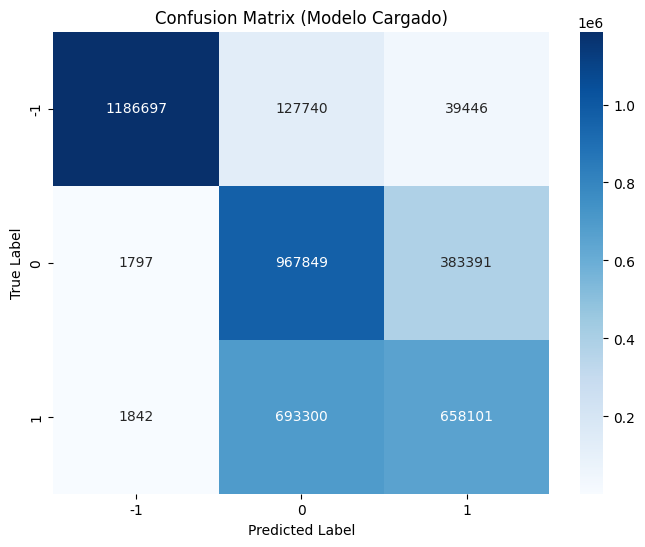

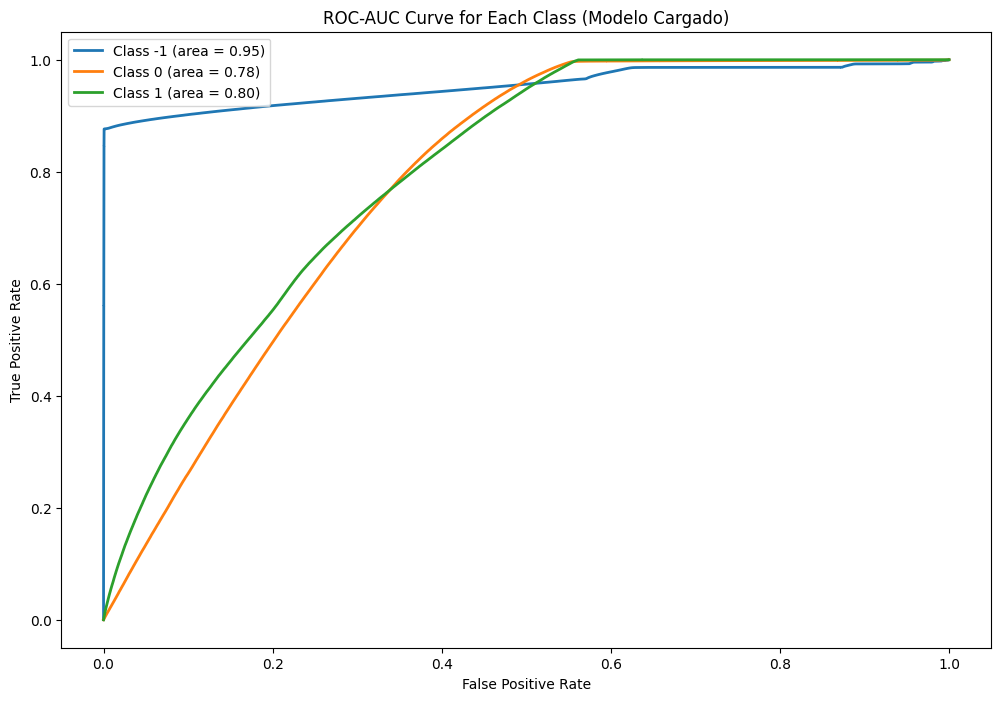

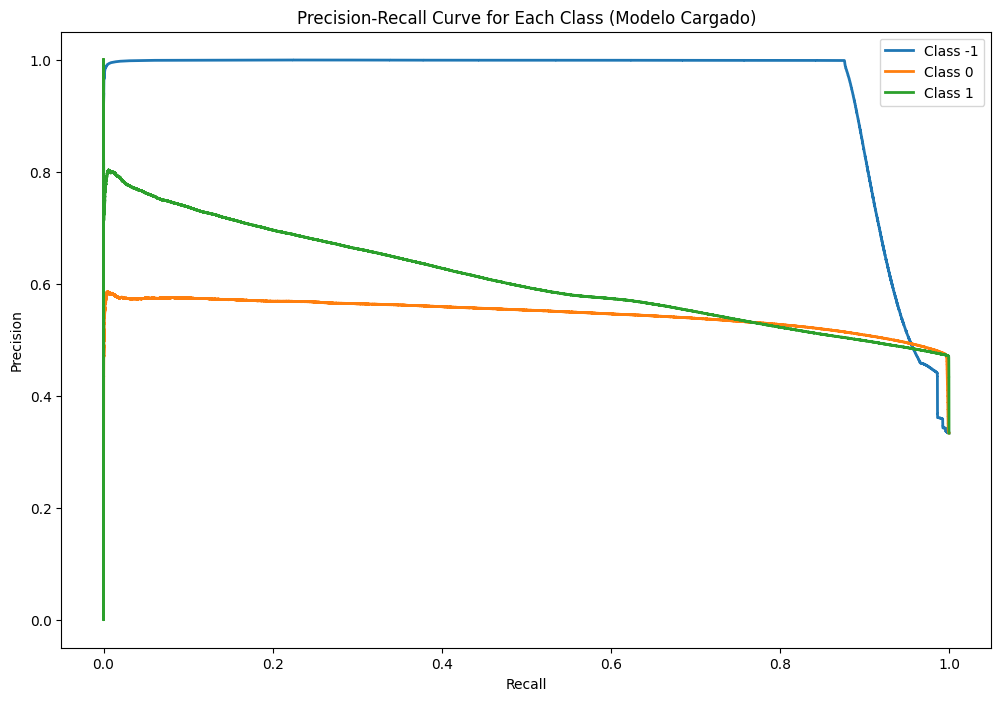

In [8]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Hacer predicciones con el modelo cargado
y_pred_cargado = model_cargado.predict(X_test)
y_pred_proba_cargado = model_cargado.predict_proba(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_cargado)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Modelo Cargado)")
plt.show()

# Visualización de la curva ROC-AUC para cada clase
y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(12, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_cargado[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {i-1} (area = {roc_auc_score(y_test_bin[:, i], y_pred_proba_cargado[:, i]):.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for Each Class (Modelo Cargado)")
plt.legend()
plt.show()


# Visualización de la curva precisión-recall para cada clase
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba_cargado[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i-1}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class (Modelo Cargado)")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que X_train y y_train estén definidos y preparados correctamente
# Si ya tienes X_train y y_train, puedes continuar con este paso

# Generar la curva de aprendizaje usando el modelo cargado
train_sizes, train_scores, test_scores = learning_curve(
    model_cargado,               # El modelo preentrenado cargado
    X_train,                     # Conjunto de datos de entrenamiento
    y_train,                     # Etiquetas de entrenamiento
    cv=5,                        # Validación cruzada con 5 pliegues
    scoring='accuracy',          # Métrica de exactitud
    n_jobs=-1,                   # Usar todos los núcleos disponibles
    train_sizes=np.linspace(0.1, 1.0, 10)  # Tamaños de los conjuntos de entrenamiento
)

# Calcular las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation score")

# Rellenar el área de desviación estándar
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

# Añadir etiquetas y título
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve (Modelo Preentrenado)")
plt.legend(loc="best")
plt.grid()
plt.show()


In [9]:
import numpy as np
import pandas as pd

# Ejemplo de nuevos datos para hacer predicciones
# Crear un DataFrame de prueba con los mismos nombres de columna y tipos de datos
X_nuevos = pd.DataFrame({
    'user_id': [34176, 12345, 67890, 11121, 31415],      # ID de usuario, solo un ejemplo
    'age_range': [6.0, 3.0, 4.0, 5.0, 2.0],              # Intervalo de edad
    'gender': [0.0, 1.0, 0.0, 1.0, 0.0],                 # Género (suponiendo 0: masculino, 1: femenino)
    'merchant_id': [944, 122, 344, 599, 878],            # ID del comerciante
    'item_id': [408895, 123456, 789012, 345678, 901234], # ID del artículo
    'category_id': [1505, 1600, 1700, 1500, 1605],       # ID de la categoría
    'brand_id': [7370, 7470, 7570, 7670, 7770],          # ID de la marca
    'clicks': [1, 3, 5, 0, 2],                           # Número de clics
    'add_to_cart': [0, 1, 0, 2, 1],                      # Añadido al carrito
    'purchases': [0, 0, 1, 0, 0],                        # Compras realizadas
    'add_to_favorites': [0, 1, 0, 1, 0],                 # Añadido a favoritos
    'total_actions': [1, 5, 6, 3, 4],                    # Total de acciones
    'unique_item_count': [1, 1, 2, 1, 1]                 # Conteo de ítems únicos
})

# Escalar los nuevos datos utilizando el mismo escalador ajustado anteriormente
X_nuevos_scaled = scaler.transform(X_nuevos)

# Realizar la predicción de clases con el modelo entrenado
y_pred_nuevos = model.predict(X_nuevos_scaled)

# (Opcional) Obtener las probabilidades de predicción para cada clase
y_pred_proba_nuevos = model.predict_proba(X_nuevos_scaled)

# Mostrar los resultados
print("Clases predichas para los nuevos datos:", y_pred_nuevos)
print("Probabilidades para cada clase en los nuevos datos:\n", y_pred_proba_nuevos)


Clases predichas para los nuevos datos: [-1 -1  0 -1  0]
Probabilidades para cada clase en los nuevos datos:
 [[9.43121167e-001 3.21480182e-002 2.47308153e-002]
 [9.92419282e-001 7.58071765e-003 6.78621895e-082]
 [1.85132061e-001 4.24548595e-001 3.90319344e-001]
 [9.98920700e-001 1.07929987e-003 1.57950802e-161]
 [4.51476160e-001 5.48523840e-001 7.41485988e-080]]


In [ ]:
# Cargar el modelo y las métricas desde el archivo
modelo_y_metricas_cargado = joblib.load('modelo_logistico_con_metricas.pkl')

# Obtener el modelo y las métricas
model_cargado = modelo_y_metricas_cargado['model']
metrics_cargadas = modelo_y_metricas_cargado['metrics']

# Mostrar las métricas cargadas
print("Exactitud del modelo:", metrics_cargadas['accuracy'])
print("Matriz de confusión:\n", metrics_cargadas['confusion_matrix'])
print("Reporte de clasificación:\n", metrics_cargadas['classification_report'])
